# Decision Trees: Strengths and Weaknesses

## 1. Learning Goals

By the end of this notebook, you will be able to:

- **Understand how Decision Trees work for classification tasks**  
  You'll learn how decision trees split data based on feature values to create simple, interpretable models.

- **Observe Decision Trees on both simple and complex datasets**  
  You'll evaluate how trees perform on well-structured data versus data with noise or overlapping classes.

- **Visualize decision boundaries and tree structures**  
  You'll see how trees form boundaries in feature space and how tree depth affects complexity.

- **Recognize the strengths and limitations of Decision Trees**  
  By experimenting with hyperparameters and model behavior, you'll gain insight into when decision trees are helpful — and when they may overfit or underperform.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(0)

In [2]:
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBBBFF']), alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

## 2. Decision Tree on Simple Data

Let’s start by training a decision tree on a synthetic dataset that is clean and linearly separable. This type of data allows us to clearly see how the tree splits the feature space based on informative rules.

In this scenario, we expect the decision tree to perform well, both in terms of accuracy and interpretability. You’ll visualize the 2D decision boundary, then inspect the corresponding tree structure to see how each decision is made at various levels of the tree.

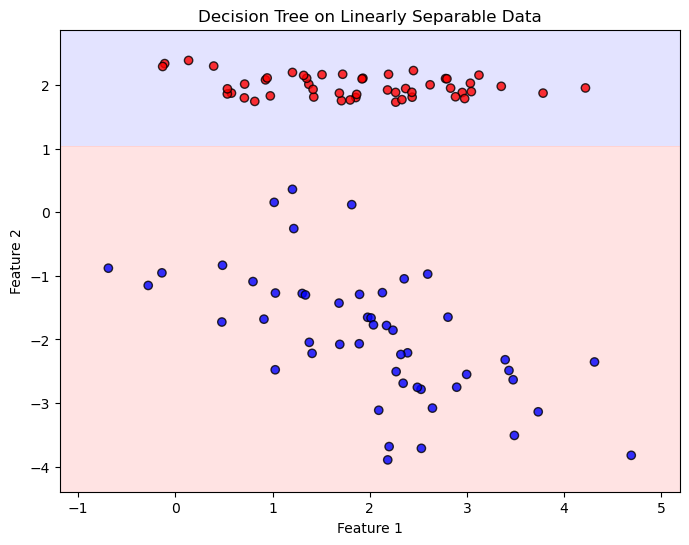

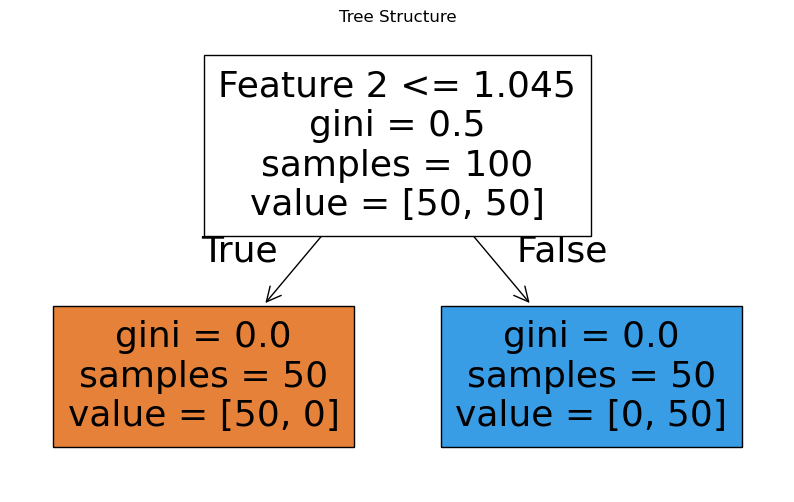

In [3]:
# Generate data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=2.0, random_state=0)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(model, X, y, ax, "Decision Tree on Linearly Separable Data")
plt.show()

# Plot tree structure
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=["Feature 1", "Feature 2"])
plt.title("Tree Structure")
plt.show()

✅ **Strength**: Decision Trees are interpretable, fast, and perform well on structured data where relationships can be captured through rule-based splitting.

## 3. Decision Tree on Noisy or Complex Data

Now let’s examine how a decision tree behaves with data that is more difficult to separate. This dataset includes noise and overlapping classes, which makes it challenging to learn a perfect boundary.

In such settings, a decision tree may grow deep and overfit the training data — memorizing specific patterns rather than generalizing well. We’ll train a deep, unrestricted tree and observe how complex the resulting structure becomes.

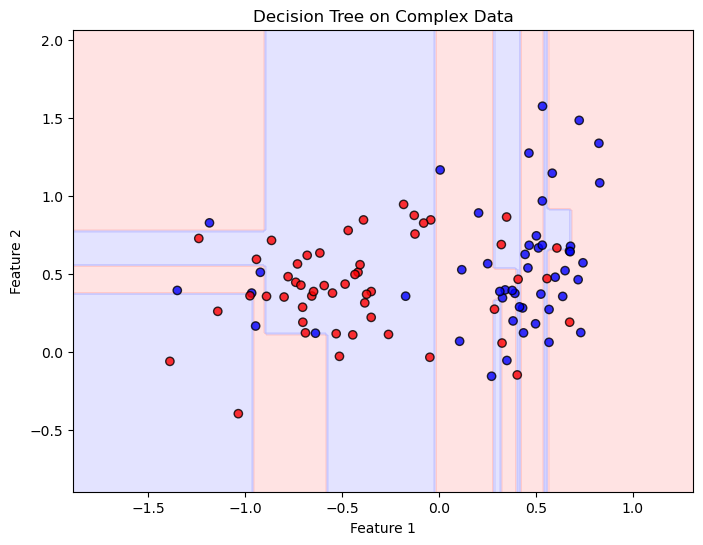

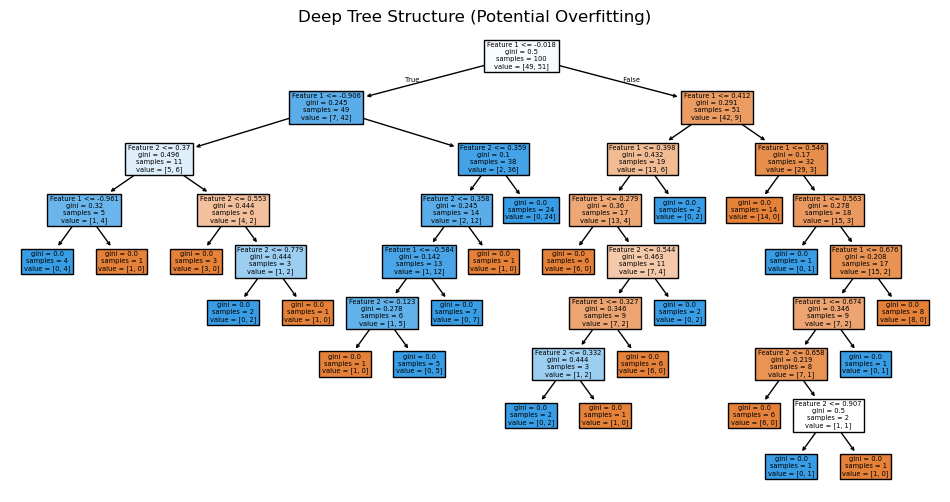

In [4]:
# Generate complex dataset
X_complex, y_complex = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                           n_informative=2, n_clusters_per_class=1,
                                           class_sep=0.5, flip_y=0.3, random_state=1)

# Train a decision tree without max_depth limitation
model_complex = DecisionTreeClassifier(max_depth=None)
model_complex.fit(X_complex, y_complex)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(model_complex, X_complex, y_complex, ax, "Decision Tree on Complex Data")
plt.show()

# Visualize tree structure
plt.figure(figsize=(12, 6))
plot_tree(model_complex, filled=True, feature_names=["Feature 1", "Feature 2"])
plt.title("Deep Tree Structure (Potential Overfitting)")
plt.show()

⚠️ **Weakness**: Decision Trees can easily overfit complex or noisy datasets, creating deep trees that perfectly fit the training data but perform poorly on new, unseen examples.

## 4. Quantitative Performance Check

To measure generalization, we’ll split the complex dataset into training and test sets. Then we’ll evaluate accuracy on the test set using a default decision tree.

This gives us a numerical sense of how well the tree performs on unseen data. For a deeper look, we’ll also compare test accuracy across different tree depths.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_complex, y_complex, test_size=0.2, random_state=42)

for depth in [1, 3, 5, None]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Max depth = {depth}, Test Accuracy = {acc:.2f}")

Max depth = 1, Test Accuracy = 0.80
Max depth = 3, Test Accuracy = 0.75
Max depth = 5, Test Accuracy = 0.75
Max depth = None, Test Accuracy = 0.75


## 5. Summary and Reflection

In this notebook, you explored the behavior of Decision Trees on both simple and complex datasets. You observed how trees construct interpretable rules through data splitting, and how their flexibility can become a double-edged sword.

On clean, structured data, decision trees can quickly learn accurate models that are easy to explain. But on noisy or overlapping data, they may grow unnecessarily deep and overfit, reducing performance on unseen data.

While decision trees are valuable for their clarity and speed, they often benefit from regularization (e.g., `max_depth`, `min_samples_split`) or being combined into ensembles like Random Forests or Gradient Boosting Machines.

---

📝 **Reflection Question**:

Which of the following is a common limitation of Decision Trees?

A. They cannot be used for classification problems  
B. They always generalize well to unseen data  
C. They are prone to overfitting, especially on noisy datasets  
D. They require deep neural networks to function

✅ Select the best answer and explain your reasoning.